<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Feedforward%20Neural%20Networks/Forecasting_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [78]:
# Loading data
gila_river =  pd.read_csv("https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Multiple%20Linear%20Regression/GilaRiverFlow.csv")

n = len(gila_river.columns)

X  = gila_river.iloc[:,0:n-1].values
y  = gila_river.iloc[:,n-1].values


In [79]:
gila_river.head()

,y(k-1),y(k-2),y(k-3),y(k)
0,0,0,0,42
1,42,0,0,41
2,41,42,0,39
3,39,41,42,37
4,37,39,41,36


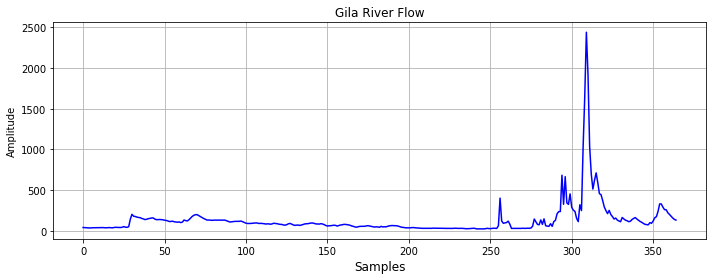

In [80]:
from IPython.core.pylabtools import figsize
# Drawing the data
fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
plt.plot(y,'-b')
plt.xlabel(r'Samples', fontsize=12)
plt.ylabel(r'Amplitude')
plt.title('Gila River Flow')
plt.grid(True)
plt.show()

In [81]:
# Spliting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape, y_train.shape

((292, 3), (292,))

**MLPClassifier Tuning Parameters**
1. hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.
2. max_iter: It denotes the number of epochs.
3. activation: The activation function for the hidden layers.
4. solver: This parameter specifies the algorithm for weight optimization across the nodes.


In [88]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,20), 
                                            activation='relu', 
                                            solver='adam', 
                                            learning_rate='constant',
                                            learning_rate_init= 0.001,
                                            momentum=0.5,
                                            max_iter=300)

In [95]:
mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test  = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


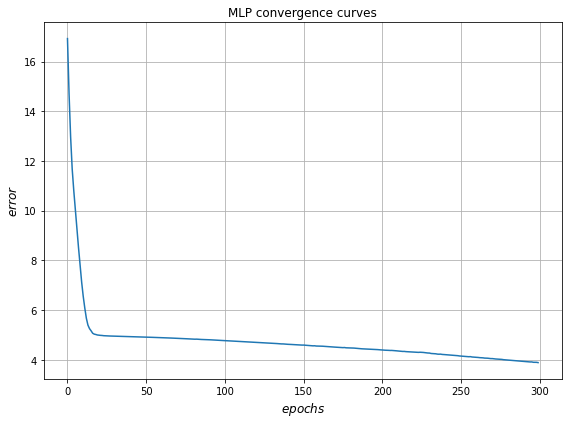

In [93]:
fig, axs = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.plot(mlp.loss_curve_)
plt.xlabel(r'$ epochs $', fontsize=12)
plt.ylabel(r'$ error $', fontsize=12)
plt.title('MLP convergence curves')
plt.grid(True)
plt.show()

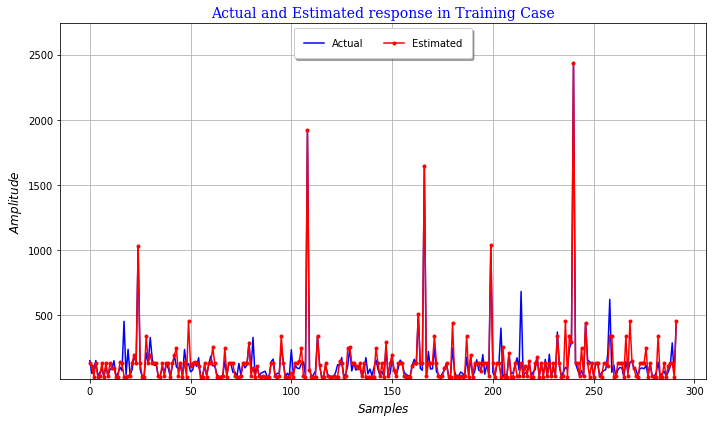

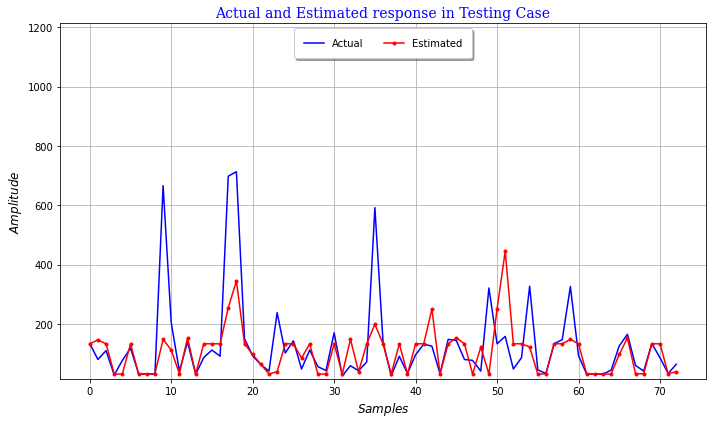

In [94]:
# Drawing the actual and estimated responses

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.plot(y_train, '-b', label='Actual')
plt.plot(y_pred_train, '.-r', label='Estimated')

plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitude $', fontsize=12)

plt.title(r'Actual and Estimated response in Training Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+300)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_test, '-b', label='Actual')
plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitude $', fontsize=12)
plt.title(r'Actual and Estimated response in Testing Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+500)
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()

In [86]:
# Calculating Performance Criteria
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score

mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

mae1 = mean_absolute_error(y_train, y_pred_train)
mae2 = mean_absolute_error(y_test, y_pred_test)

accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy2 = accuracy_score(y_test, y_pred_test)

print('mean_squared_error_train (MSE):', format(mse1,".5f"), '    ', 'mean_squared_error_test (MSE):', format(mse2,".5f"),)
print('mean_absolute_error_train (MAE):', format(mae1,".5f"), '    ', 'mean_absolute_error_test (MAE):', format(mae2,".5f"),)
print('Accuracy Score:', format(vs1,".5f"), '    ', 'Accuracy Score:', format(vs2,".5f"),)


mean_squared_error_train (MSE): 34313.13014      mean_squared_error_test (MSE): 26644.61644
mean_absolute_error_train (MAE): 67.47945      mean_absolute_error_test (MAE): 73.10959
Accuracy Score: 0.02529      Accuracy Score: 0.01943
